In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scrapping of Single Page

In [2]:
Brand=[]
Capacity=[]
Doors=[]
Stars=[]
Ratings=[]
Compressor=[]
price=[]
Compressor=[]
url="https://www.flipkart.com/search?q=refrigerator&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}
response=requests.get(url,headers=headers)
if response.status_code==200:
    soup=BeautifulSoup(response.text)
    for ele in soup.find_all('div',class_='jIjQ8S'):
        t= ele.find('div',class_='RG5Slk').text
        b=re.findall('^\w+',t)[0]
        Brand.append(b)
        #capacity
        c=re.findall('\w+(\s\d+)\sL',t)
        Capacity.append(c[0])
        #doors
        d=re.findall('\w+\sDoor',t)
        if d:
            Doors.append(d[0])
        else:
            Doors.append(np.nan)
        #stars
        s=re.findall('\d+\sStar',t)
        if s:
            Stars.append(s[0])
        else:
            Stars.append(np.nan)
        #ratings
        r=ele.find('div',class_='MKiFS6')
        Ratings.append(r)
        Compressor.append(c[0])
        #Price
        P=ele.find('div',class_='hZ3P6w DeU9vF').text
        price.append(P)


In [295]:
price

['₹25,490',
 '₹11,990',
 '₹13,990',
 '₹16,190',
 '₹17,290',
 '₹11,990',
 '₹16,490',
 '₹13,990',
 '₹8,490',
 '₹17,290',
 '₹35,490',
 '₹11,990',
 '₹14,490',
 '₹17,990',
 '₹25,490',
 '₹19,990',
 '₹13,490',
 '₹15,990',
 '₹12,390',
 '₹16,990',
 '₹16,240',
 '₹46,990',
 '₹19,290',
 '₹21,299']

In [298]:
Capacity

[' 244',
 ' 183',
 ' 185',
 ' 183',
 ' 183',
 ' 185',
 ' 184',
 ' 183',
 ' 90',
 ' 183',
 ' 325',
 ' 180',
 ' 190',
 ' 189',
 ' 236',
 ' 215',
 ' 183',
 ' 183',
 ' 183',
 ' 185',
 ' 192',
 ' 396',
 ' 234',
 ' 240']

In [299]:
Stars

['4 Star',
 '2 Star',
 '2 Star',
 '4 Star',
 '5 Star',
 '2 Star',
 '5 Star',
 '2 Star',
 '1 Star',
 '5 Star',
 '3 Star',
 '2 Star',
 '4 Star',
 '5 Star',
 '3 Star',
 '5 Star',
 '2 Star',
 '5 Star',
 '2 Star',
 '5 Star',
 '4 Star',
 '3 Star',
 '5 Star',
 '2 Star']

In [300]:
print(len(Brand))
print(len(Capacity))
print(len(Ratings))
print(len(price))
print(len(Stars))
print(len(Compressor))
print(len(Doors))

24
24
24
24
24
24
24


# Scrapping Data From Multiple Pages

In [9]:
brand=[]
capacity=[]
doors=[]
stars=[]
ratings=[]
compressor=[]
Price=[]
for i in range(1,51):
    url = f"https://www.flipkart.com/search?q=refrigerator&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}
    response = requests.get(url,headers=headers)
    if response.status_code==200:
        soup = BeautifulSoup(response.text)
        for ele in soup.find_all('div',class_='jIjQ8S'):
        #Brand
            t= ele.find('div',class_='RG5Slk').text
            b=re.findall('^\w+',t)[0]
            brand.append(b)
        #capacity
            c=re.findall('\w+(\s\d+)\sL',t)
            if c:
                capacity.append(c[0])
            else:
                capacity.append(np.nan)
        #doors
            d=re.findall('\w+\sDoor',t)
            if d:
                doors.append(d[0])
            else:
                doors.append(np.nan)
        #stars
            s=re.findall('(\d+)\sStar',t)
            if s:
                stars.append(s[0])
            else:
                stars.append(np.nan)
        #ratings
            r=ele.find('div',class_='MKiFS6')
            if r:
                ratings.append(r.text)
            else:
                ratings.append(np.nan)
        #Price
            p=ele.find('div',class_='hZ3P6w DeU9vF').text
            Price.append(p)


        else:
            print('something went wrong')

something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something wen

In [323]:
len(brand)

984

In [324]:
len(ratings)

984

In [325]:
len(Price)

984

In [326]:
len(capacity)

984

In [327]:
len(stars)

984

In [328]:
len(doors)

984

In [309]:
capacity

[' 185',
 ' 223',
 ' 185',
 ' 183',
 ' 183',
 ' 183',
 ' 185',
 ' 244',
 ' 184',
 ' 183',
 ' 223',
 ' 236',
 ' 183',
 ' 244',
 ' 90',
 ' 325',
 ' 396',
 ' 236',
 ' 180',
 ' 236',
 ' 330',
 ' 236',
 ' 189',
 ' 190',
 ' 184',
 ' 183',
 ' 185',
 ' 244',
 ' 256',
 ' 183',
 ' 223',
 ' 236',
 ' 233',
 ' 183',
 ' 183',
 ' 180',
 ' 244',
 ' 396',
 ' 180',
 ' 189',
 ' 236',
 ' 330',
 ' 190',
 ' 197',
 ' 243',
 ' 190',
 ' 236',
 ' 236',
 ' 185',
 ' 244',
 ' 185',
 ' 223',
 ' 183',
 ' 183',
 ' 236',
 ' 183',
 ' 223',
 ' 396',
 ' 350',
 ' 180',
 ' 350',
 ' 419',
 ' 201',
 ' 183',
 ' 187',
 ' 472',
 ' 244',
 ' 330',
 ' 183',
 ' 190',
 ' 330',
 ' 467',
 ' 183',
 ' 194',
 ' 183',
 ' 236',
 ' 244',
 ' 183',
 ' 183',
 ' 350',
 ' 180',
 ' 201',
 ' 183',
 ' 187',
 ' 472',
 ' 183',
 ' 190',
 ' 602',
 ' 233',
 ' 223',
 ' 236',
 ' 385',
 ' 228',
 ' 322',
 ' 183',
 ' 228',
 ' 185',
 ' 223',
 ' 190',
 ' 330',
 ' 183',
 ' 184',
 ' 244',
 ' 223',
 ' 228',
 ' 243',
 ' 236',
 ' 244',
 ' 190',
 ' 419',
 ' 303',
 '

In [310]:
ratings

['4.3',
 '4.2',
 '4.3',
 '4.3',
 '4.5',
 '4.5',
 '4.3',
 '4.2',
 '4.4',
 '4.5',
 '4.2',
 '4.4',
 '4.5',
 '4.2',
 '4.2',
 '4.4',
 '4.2',
 '4.4',
 '4.3',
 '4.4',
 '4.2',
 '4.3',
 '4.5',
 '4.4',
 '4.3',
 '4.4',
 '4.3',
 '4.2',
 '4.3',
 '4.5',
 '4.2',
 '4.4',
 '4.3',
 '4.3',
 '4.5',
 '4.3',
 '4.2',
 '4.2',
 '4.4',
 '4.5',
 '4.4',
 '4.2',
 '4.4',
 '4.4',
 '4.2',
 '4.4',
 '4.3',
 '4.4',
 '4.4',
 '4.2',
 '4.3',
 '4.2',
 '4.3',
 '4.5',
 '4.3',
 '4.4',
 '4.2',
 '4.2',
 '4.2',
 '4.4',
 '4.2',
 '4.2',
 '4.4',
 '4.5',
 '4.4',
 '4.3',
 '4.2',
 '4.2',
 '4.2',
 '4.3',
 '4.2',
 '4.1',
 '4.3',
 '4.3',
 '4.5',
 '4.3',
 '4.2',
 '4.4',
 '4.4',
 '4.2',
 '4.4',
 '4.4',
 '4.5',
 '4.4',
 '4.3',
 '4.2',
 '4.3',
 '4.5',
 '4.3',
 '4.2',
 '4.4',
 '4.2',
 '4.2',
 '4.2',
 '4.1',
 '4.4',
 '4.3',
 '4.2',
 '4.4',
 '4.2',
 '4.5',
 '4.4',
 '4.2',
 '4.2',
 '4.2',
 '4.3',
 '4.4',
 '4.2',
 '4.3',
 '4.2',
 '4.4',
 '4.5',
 '4.2',
 '4.4',
 '4.4',
 '4.3',
 '4.3',
 '4.4',
 '4.3',
 '4.2',
 '4.4',
 '4.3',
 '4.3',
 '4.2',
 '4.1',


In [311]:
doors

['Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single

In [312]:
stars

['5',
 '3',
 '2',
 '2',
 '4',
 '5',
 '2',
 '4',
 '5',
 '2',
 '2',
 '3',
 '5',
 '4',
 '1',
 '3',
 '3',
 '2',
 '2',
 '3',
 '2',
 '2',
 '5',
 '4',
 '2',
 '4',
 '5',
 '4',
 '3',
 '5',
 '2',
 '3',
 '2',
 '2',
 '4',
 '2',
 '4',
 '3',
 '4',
 '5',
 '2',
 '2',
 '5',
 '5',
 '2',
 '4',
 '2',
 '3',
 '4',
 '4',
 '5',
 '2',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '2',
 '3',
 '5',
 '4',
 '5',
 nan,
 '4',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '5',
 '4',
 '3',
 '4',
 '4',
 '3',
 '3',
 '4',
 '5',
 '4',
 '5',
 nan,
 '3',
 '2',
 nan,
 '3',
 '3',
 '5',
 '2',
 '3',
 '3',
 '4',
 '5',
 '5',
 '3',
 '5',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 nan,
 '3',
 '2',
 '5',
 '3',
 '2',
 '3',
 '4',
 '2',
 '5',
 '2',
 '5',
 '3',
 '2',
 '3',
 '4',
 '2',
 '3',
 nan,
 '3',
 '5',
 '3',
 '4',
 '4',
 '3',
 '2',
 '2',
 '5',
 '5',
 '4',
 '4',
 '2',
 '3',
 '5',
 '3',
 '5',
 '3',
 '2',
 nan,
 '5',
 '3',
 '4',
 '3',
 '3',
 nan,
 '4',
 '3',
 '5',
 '3',
 '5',
 '4',
 '2',
 '2',
 nan,
 '5',
 '2'

In [11]:
data={'Brand':brand,'Capacity(in L)':capacity,'Rating':ratings,'Doors':doors,'Stars':stars,'Price':Price}

In [12]:
df=pd.DataFrame(data)

In [13]:
df

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185,4.3,Single Door,5,"₹15,790"
1,Godrej,180,4.4,Single Door,4,"₹14,480"
2,Samsung,183,4.5,Single Door,2,"₹12,990"
3,Voltas,183,4.3,Single Door,2,"₹11,990"
4,Samsung,183,4.5,Single Door,4,"₹16,190"
...,...,...,...,...,...,...
955,Godrej,194,4.3,Single Door,5,"₹16,990"
956,Samsung,183,NaN,Single Door,2,"₹15,190"
957,Samsung,183,4.4,Single Door,2,"₹11,990"
958,Whirlpool,308,4,Double Door,3,"₹32,490"


In [14]:
df['Price']=df['Price'].apply(lambda x:re.sub('[^\d+]','',x))

In [15]:
df

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185,4.3,Single Door,5,15790
1,Godrej,180,4.4,Single Door,4,14480
2,Samsung,183,4.5,Single Door,2,12990
3,Voltas,183,4.3,Single Door,2,11990
4,Samsung,183,4.5,Single Door,4,16190
...,...,...,...,...,...,...
955,Godrej,194,4.3,Single Door,5,16990
956,Samsung,183,NaN,Single Door,2,15190
957,Samsung,183,4.4,Single Door,2,11990
958,Whirlpool,308,4,Double Door,3,32490


In [16]:
df.isnull().sum()

Brand              0
Capacity(in L)     2
Rating            98
Doors             32
Stars             42
Price              0
dtype: int64

In [17]:
numeric_cols=['Capacity(in L)','Stars','Price','Rating']
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

## Removing Null values

In [18]:
df['Capacity(in L)'].mean()

np.float64(233.67014613778704)

In [19]:
## removing null values in capacity column:
df['Capacity(in L)']=df['Capacity(in L)'].fillna(df['Capacity(in L)'].mean())

In [20]:
df['Capacity(in L)'].isnull().sum()

np.int64(0)

In [21]:
df['Rating'].mean()

np.float64(4.27969837587007)

In [22]:
## removing null values in capacity column:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [23]:
df['Rating'].isnull().sum()

np.int64(0)

In [24]:
##  removing null values in Doors column:
df['Doors']=df['Doors'].fillna('Single Door')

In [27]:
df['Doors'].mode()

0    Single Door
Name: Doors, dtype: object

In [28]:
df['Doors'].isnull().sum()

np.int64(0)

In [29]:
## removing null values in Stars:
df['Stars']=df['Stars'].fillna(df['Stars'].mode().values[0])

In [30]:
df['Stars'].isnull().sum()

np.int64(0)

In [31]:
df['Price'].isnull().sum()

np.int64(0)

### checking the null vallues

In [32]:
df.isnull().sum()

Brand             0
Capacity(in L)    0
Rating            0
Doors             0
Stars             0
Price             0
dtype: int64

# Basic Checks

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           960 non-null    object 
 1   Capacity(in L)  960 non-null    float64
 2   Rating          960 non-null    float64
 3   Doors           960 non-null    object 
 4   Stars           960 non-null    float64
 5   Price           960 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 45.1+ KB


In [34]:
df.dtypes

Brand              object
Capacity(in L)    float64
Rating            float64
Doors              object
Stars             float64
Price               int64
dtype: object

In [35]:
df.head()

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185.0,4.3,Single Door,5.0,15790
1,Godrej,180.0,4.4,Single Door,4.0,14480
2,Samsung,183.0,4.5,Single Door,2.0,12990
3,Voltas,183.0,4.3,Single Door,2.0,11990
4,Samsung,183.0,4.5,Single Door,4.0,16190


In [36]:
df.sample(5)

,Brand,Capacity(in L),Rating,Doors,Stars,Price
304,Whirlpool,184.0,4.4,Single Door,4.0,16390
117,Samsung,183.0,4.5,Single Door,5.0,17290
299,Haier,190.0,4.3,Single Door,2.0,13999
32,Haier,190.0,4.4,Single Door,5.0,15990
139,BOSCH,243.0,4.3,Double Door,3.0,26900


In [37]:
df.describe()

,Capacity(in L),Rating,Stars,Price
count,960.000000,960.000000,960.000000,960.000000
mean,233.670146,4.279698,3.168750,23511.885417
std,100.784182,0.216943,1.144722,15596.396310
min,4.000000,2.600000,1.000000,4490.000000
25%,183.000000,4.200000,2.000000,14990.000000
50%,197.000000,4.300000,3.000000,18590.000000
75%,244.000000,4.400000,4.000000,25490.000000
max,695.000000,5.000000,5.000000,160505.000000


In [38]:
df.describe(include='O')

,Brand,Doors
count,960,960
unique,29,5
top,Godrej,Single Door
freq,325,620


## Data Manipulations

### Univariate Analysis

In [39]:
df['Brand'].value_counts()

Brand
Godrej        325
Whirlpool     184
Samsung       109
Haier          91
LG             56
Voltas         34
Lloyd          28
BOSCH          21
IFB            21
CANDY          20
realme         16
Panasonic      11
Midea           7
Kelvinator      6
MarQ            6
BPL             4
Power           4
MOTOROLA        3
Walton          3
Sharp           2
Blue            1
Acer            1
TOSHIBA         1
Rockwell        1
Lifelong        1
Electrolux      1
Liebherr        1
CRUISE          1
BLACK           1
Name: count, dtype: int64

In [40]:
df['Capacity(in L)'].value_counts()

Capacity(in L)
180.0    102
183.0    100
244.0     82
185.0     76
190.0     49
        ... 
246.0      1
280.0      1
506.0      1
340.0      1
285.0      1
Name: count, Length: 126, dtype: int64

In [41]:
df['Doors'].value_counts()

Doors
Single Door    620
Double Door    315
Triple Door     21
French Door      3
Glass Door       1
Name: count, dtype: int64

## Bivariate Analysis

In [42]:
df.groupby('Brand')['Rating'].agg(['mean','max','min','median'])

,mean,max,min,median
Brand,,,,
Acer,4.500000,4.500000,4.500000,4.500000
BLACK,5.000000,5.000000,5.000000,5.000000
BOSCH,4.395166,4.600000,4.279698,4.400000
BPL,3.800000,3.900000,3.700000,3.800000
Blue,4.100000,4.100000,4.100000,4.100000
CANDY,4.335000,4.600000,4.200000,4.300000
CRUISE,4.279698,4.279698,4.279698,4.279698
Electrolux,4.600000,4.600000,4.600000,4.600000
Godrej,4.283010,5.000000,3.300000,4.300000


In [43]:
df.groupby('Doors')['Rating'].agg(['mean','max','min'])

,mean,max,min
Doors,,,
Double Door,4.217814,5.0,2.6
French Door,4.333333,4.4,4.3
Glass Door,4.400000,4.4,4.4
Single Door,4.309999,5.0,2.7
Triple Door,4.300000,4.5,4.2


In [44]:
df.groupby('Brand')['Stars'].agg(['max','min'])

,max,min
Brand,,
Acer,3.0,3.0
BLACK,3.0,3.0
BOSCH,5.0,2.0
BPL,2.0,2.0
Blue,2.0,2.0
CANDY,5.0,1.0
CRUISE,2.0,2.0
Electrolux,1.0,1.0
Godrej,5.0,1.0


## Multivariate Analysis

In [45]:
df.groupby(['Stars','Rating','Price']).max()

Brand  Capacity(in L)        Doors
Stars Rating Price                                         
1.0   2.7    10200    Rockwell            91.0  Single Door
      3.6    10150       Lloyd            91.0  Single Door
             10190  Kelvinator            93.0  Single Door
      3.8    51990          LG           446.0  Double Door
      3.9    10190       Lloyd            92.0  Single Door
...                        ...             ...          ...
5.0   4.6    19990       BOSCH           207.0  Single Door
             21490       BOSCH           207.0  Single Door
      4.7    16820      Godrej           180.0  Single Door
      4.8    20790       Haier           185.0  Single Door
      5.0    21350   Whirlpool           207.0  Single Door

[546 rows x 3 columns]

## VisualiZations Using Matplotlib and Seaborn

In [46]:
df

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185.0,4.300000,Single Door,5.0,15790
1,Godrej,180.0,4.400000,Single Door,4.0,14480
2,Samsung,183.0,4.500000,Single Door,2.0,12990
3,Voltas,183.0,4.300000,Single Door,2.0,11990
4,Samsung,183.0,4.500000,Single Door,4.0,16190
...,...,...,...,...,...,...
955,Godrej,194.0,4.300000,Single Door,5.0,16990
956,Samsung,183.0,4.279698,Single Door,2.0,15190
957,Samsung,183.0,4.400000,Single Door,2.0,11990
958,Whirlpool,308.0,4.000000,Double Door,3.0,32490


### Univariate Analysis

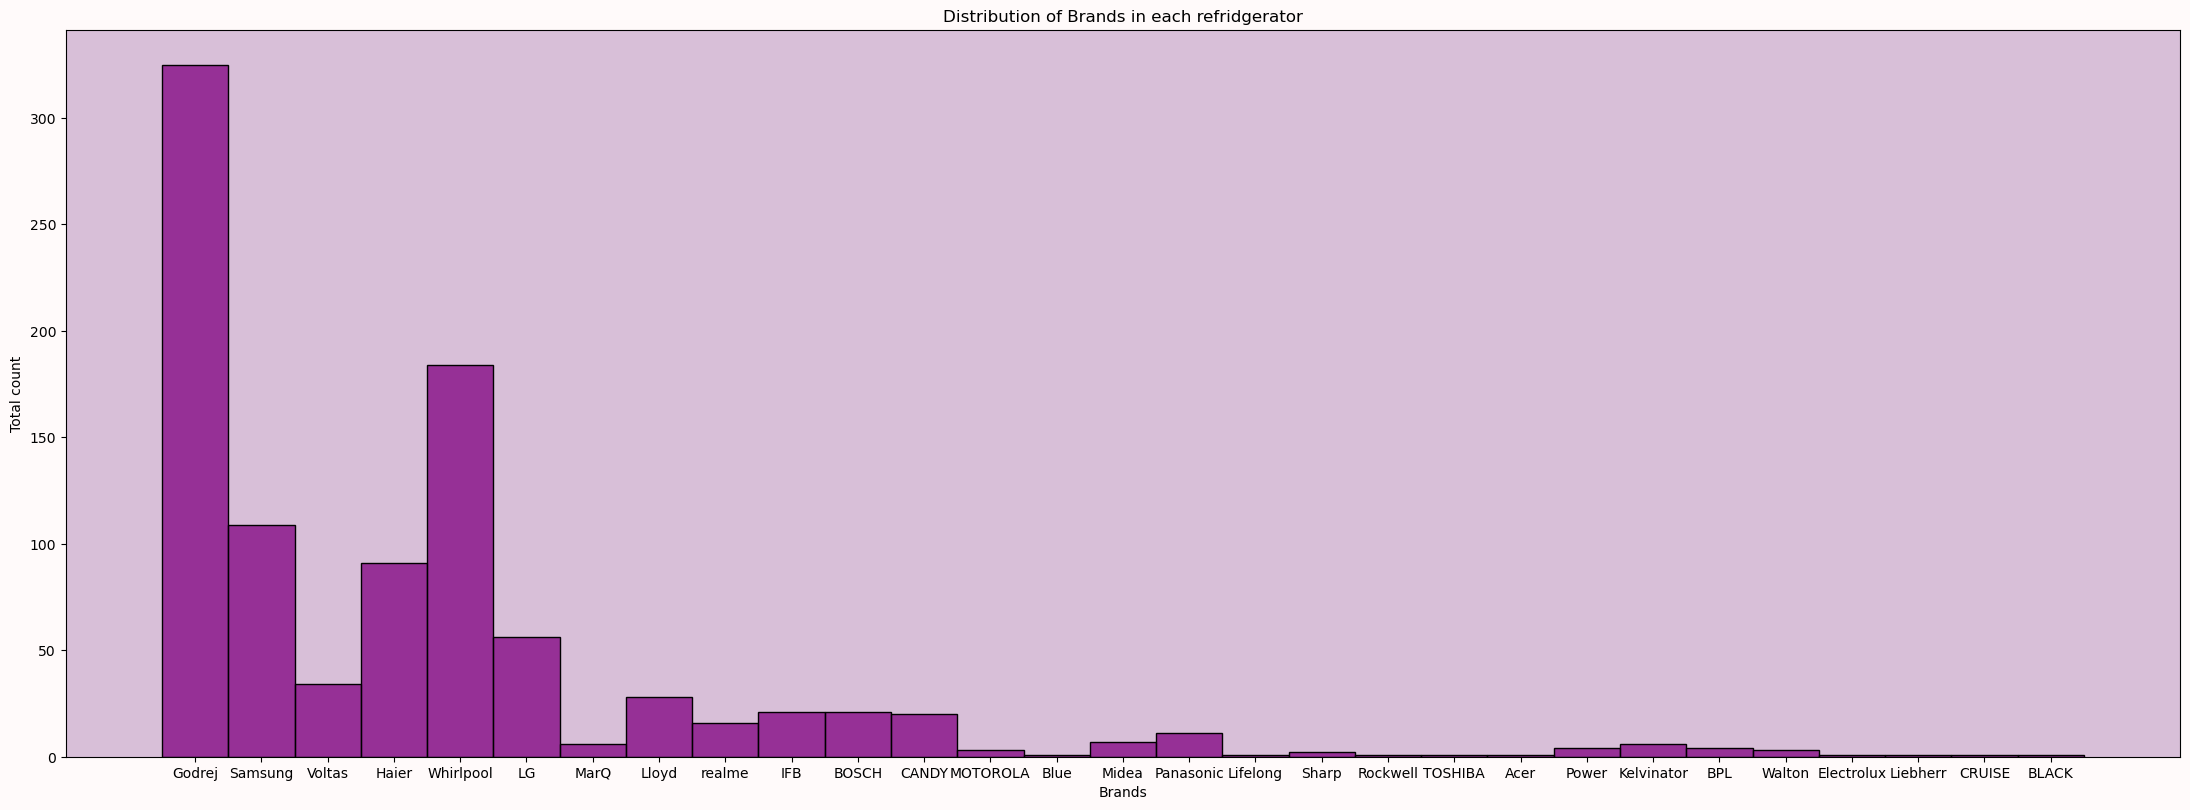

In [47]:
plt.figure(figsize=(22,8),facecolor='snow')
plt.axes(facecolor='thistle')
sns.histplot(df,x='Brand',color='purple')
plt.xlabel('Brands')
plt.ylabel('Total count')
plt.tight_layout()
plt.title('Distribution of Brands in each refridgerator')
plt.show()

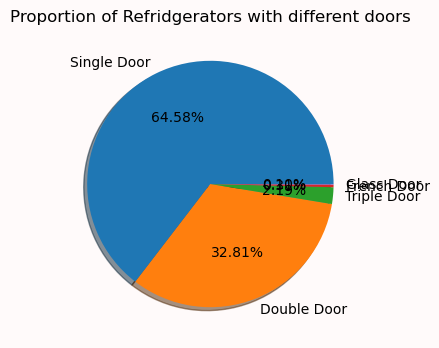

In [50]:
plt.figure(figsize=(4,4),facecolor='snow')
plt.axes(facecolor='thistle')
plt.pie(df['Doors'].value_counts(),labels=df['Doors'].value_counts().index,autopct="%1.2f%%",shadow=True)
plt.title('Proportion of Refridgerators with different doors')
plt.show()

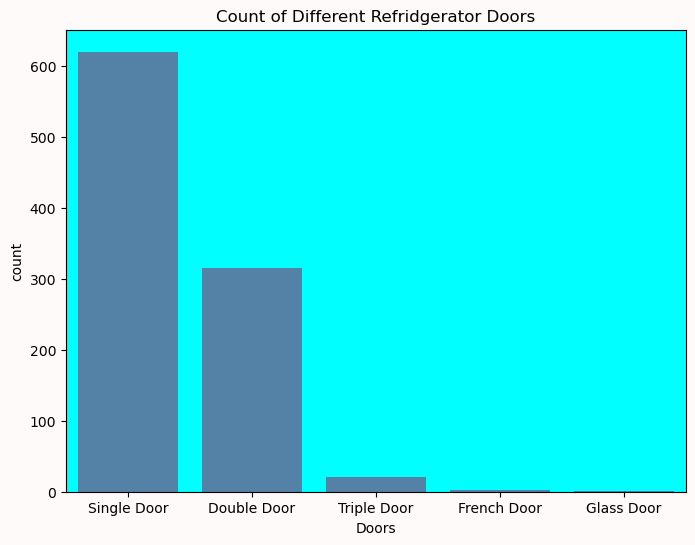

In [51]:
plt.figure(figsize=(8,6),facecolor='snow')
plt.axes(facecolor='aqua')
sns.countplot(x="Doors", data=df,color='steelblue')
plt.title("Count of Different Refridgerator Doors")
plt.show()

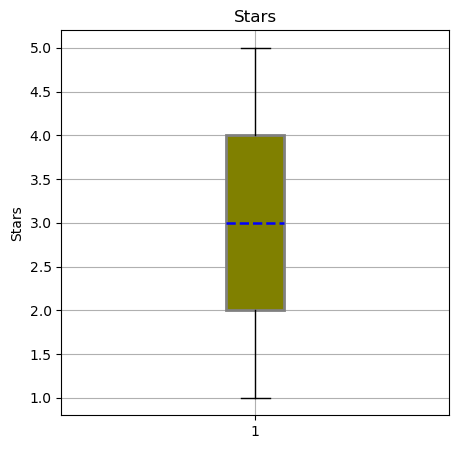

In [63]:
fig=plt.figure(figsize=(5,5))
plt.boxplot(df["Stars"],
            patch_artist=True,
            boxprops=dict(facecolor="olive",color="grey",linewidth=2),
            medianprops=dict(color="blue",linewidth=1.8,linestyle="--"),
            meanprops=dict(color="purple",linewidth=2),
            meanline=True)
plt.title("Stars")
plt.ylabel("Stars")
plt.grid()

plt.show()

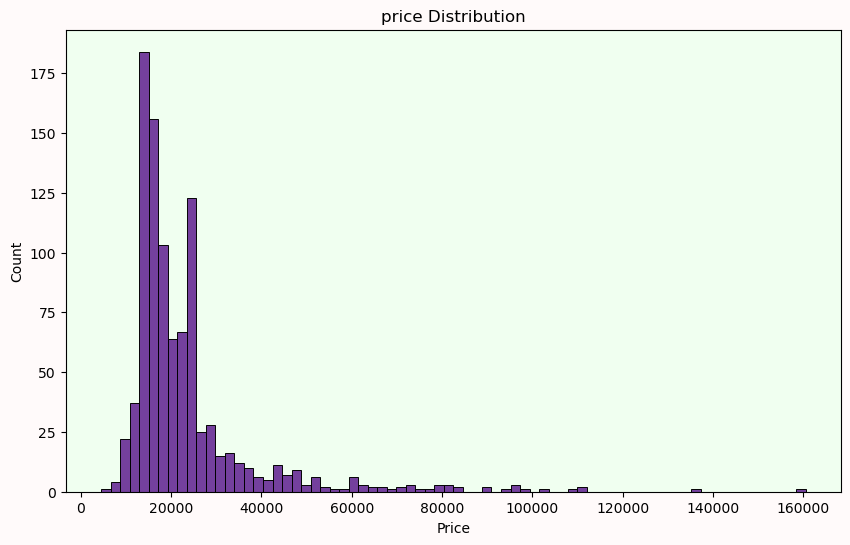

In [52]:
plt.figure(figsize=(10,6),facecolor='snow')
plt.axes(facecolor='honeydew')
sns.histplot(df["Price"],color='indigo')
plt.title("price Distribution")
plt.show()

### Bivariate Analysis

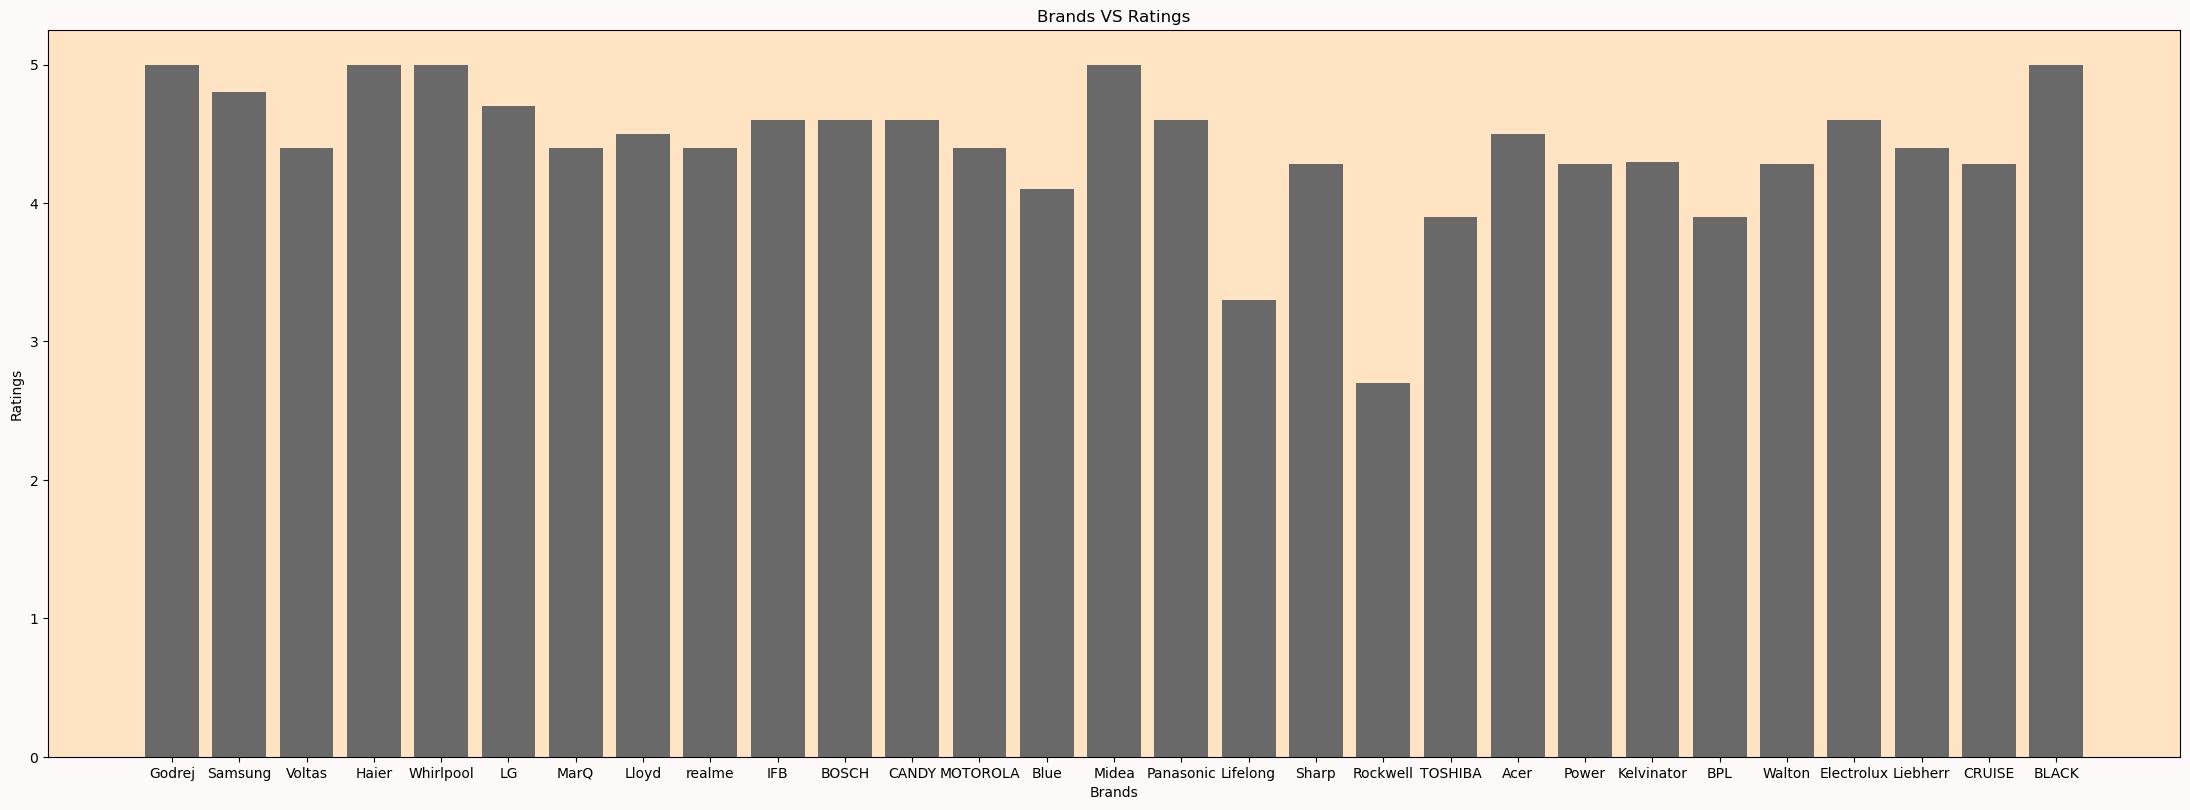

In [53]:
plt.figure(figsize=(22,8),facecolor='snow')
plt.axes(facecolor='bisque')
plt.bar(df['Brand'],df['Rating'],color='dimgray')
plt.xlabel('Brands')
plt.ylabel('Ratings')
plt.tight_layout()
plt.title('Brands VS Ratings')
plt.show()

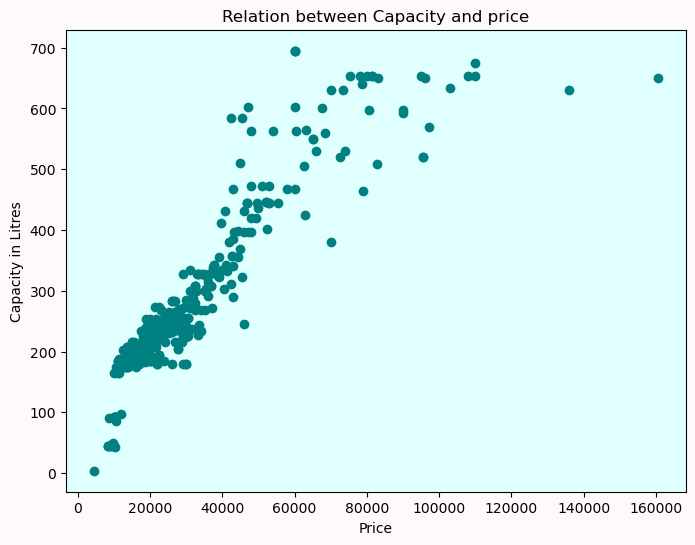

In [54]:
plt.figure(figsize=(8,6),facecolor='snow')
plt.axes(facecolor='lightcyan')
plt.scatter(df['Price'],df['Capacity(in L)'],color='teal')
plt.ylabel('Capacity in Litres')
plt.xlabel('Price')
plt.title('Relation between Capacity and price')
plt.show()

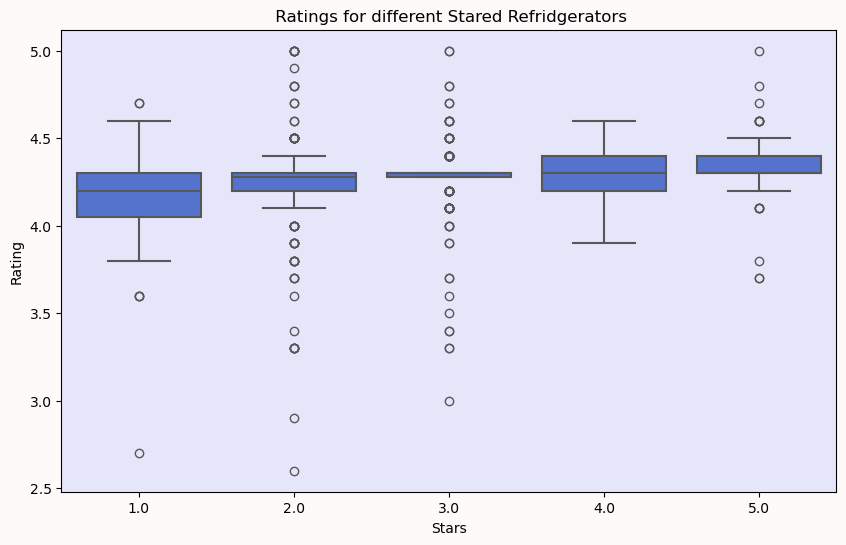

In [55]:
plt.figure(figsize=(10,6),facecolor='snow')
plt.axes(facecolor='lavender')
sns.boxplot(df,x='Stars',y='Rating',color='royalblue',linewidth=1.5,fliersize=6)
plt.title(' Ratings for different Stared Refridgerators')
plt.show()


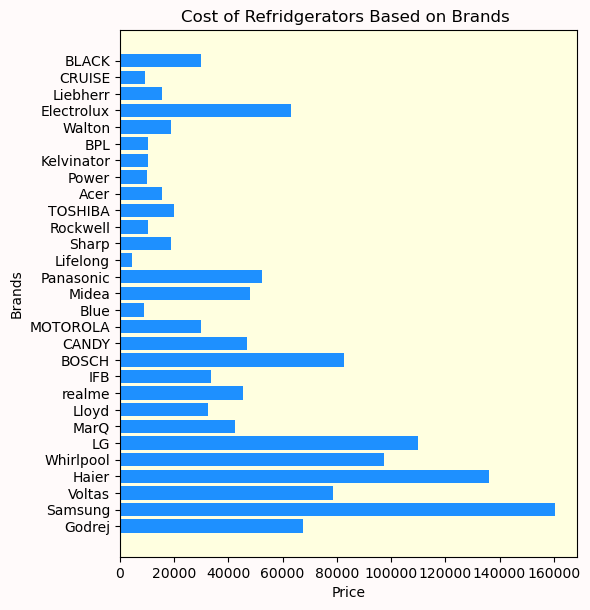

In [56]:
plt.figure(figsize=(6,6),facecolor='snow')
plt.axes(facecolor='lightyellow')
plt.barh(df['Brand'],df['Price'],color='dodgerblue')
plt.ylabel('Brands')
plt.xlabel('Price')
plt.tight_layout()
plt.title('Cost of Refridgerators Based on Brands ')
plt.show()

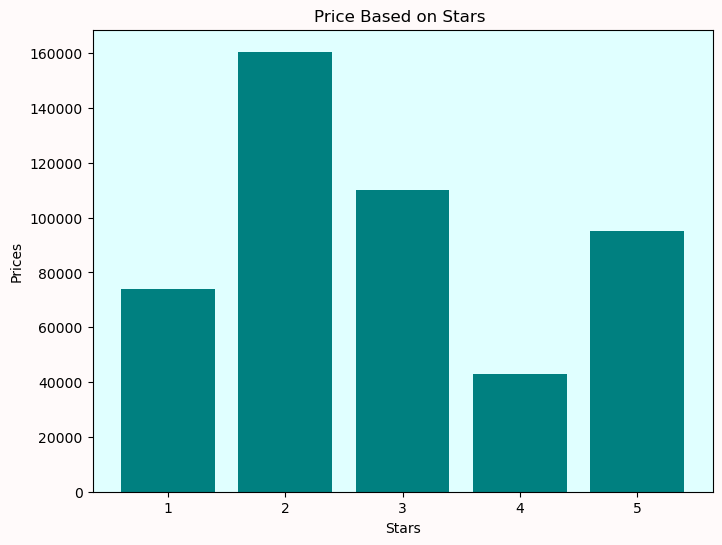

In [61]:
plt.figure(figsize=(8,6),facecolor='snow')
plt.axes(facecolor='lightcyan')
plt.bar(df['Stars'],df['Price'],color='teal')
plt.ylabel('Prices')
plt.xlabel('Stars')
plt.title('Price Based on Stars ')
plt.show()

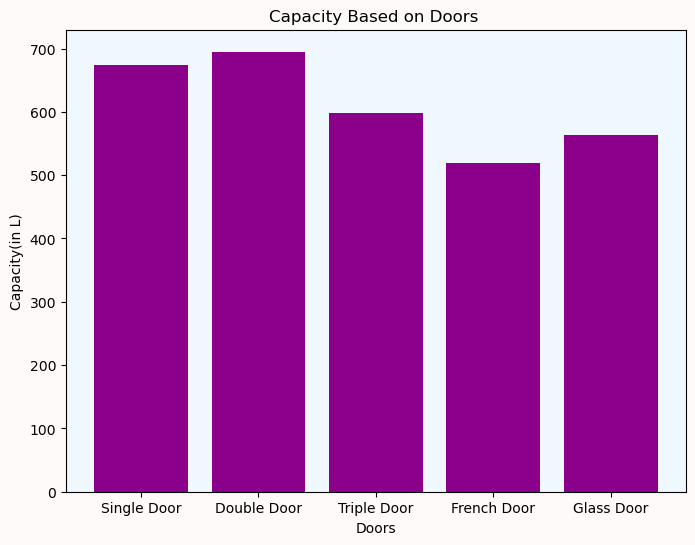

In [71]:
plt.figure(figsize=(8,6),facecolor='snow')
plt.axes(facecolor='aliceblue')
plt.bar(df['Doors'],df['Capacity(in L)'],color='darkmagenta')
plt.ylabel('Capacity(in L)')
plt.xlabel('Doors')
plt.title('Capacity Based on Doors ')
plt.show()

## Multivariate Analysis

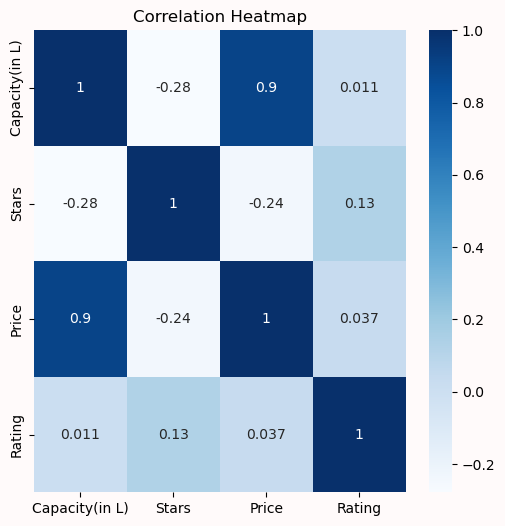

In [565]:
plt.figure(figsize=(6,6),facecolor='snow')
plt.axes(facecolor='lavender')
sns.heatmap(df[["Capacity(in L)","Stars","Price","Rating"]].corr(),annot=True,cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


<Figure size 1000x600 with 0 Axes>

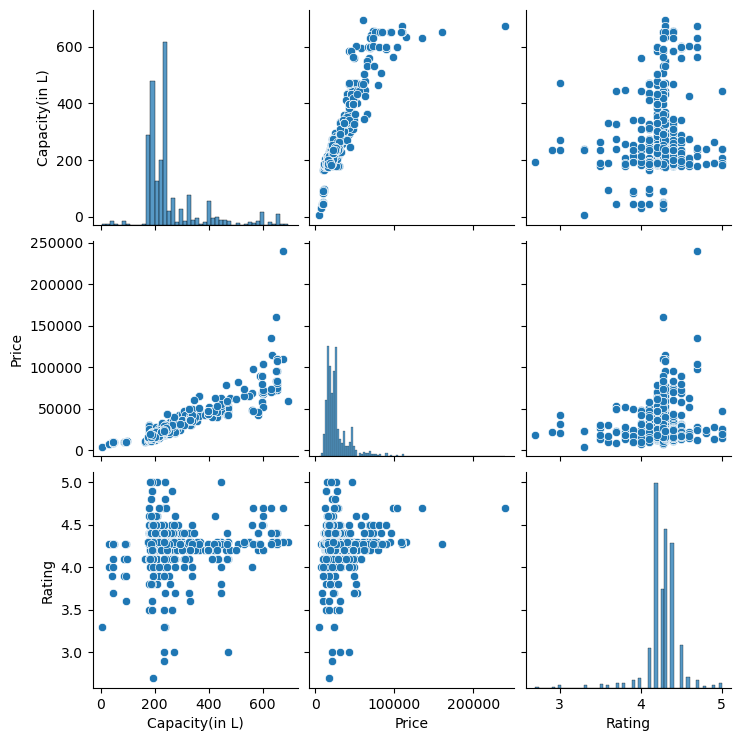

In [576]:
plt.figure(figsize=(10,6),facecolor='snow')
sns.pairplot(df[["Capacity(in L)","Price","Rating"]])
plt.show()

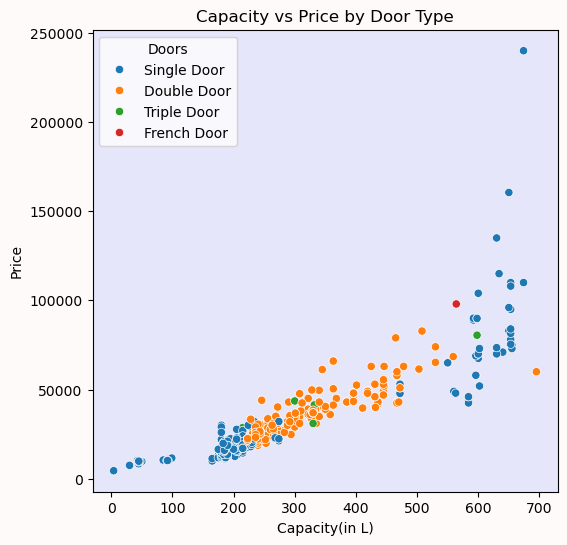

In [572]:
plt.figure(figsize=(6,6),facecolor='snow')
plt.axes(facecolor='lavender')
sns.scatterplot(x="Capacity(in L)", y="Price", hue="Doors",data=df)
plt.title("Capacity vs Price by Door Type")
plt.show()
